# `nphase_border`
Computes the number of phases that border on each pixel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

The arguments and their defaults are:

In [2]:
import inspect
inspect.signature(ps.filters.nphase_border)

<Signature (im, include_diagonals=False)>

## `im`
This function works on both 2D and 3D images.  If an im

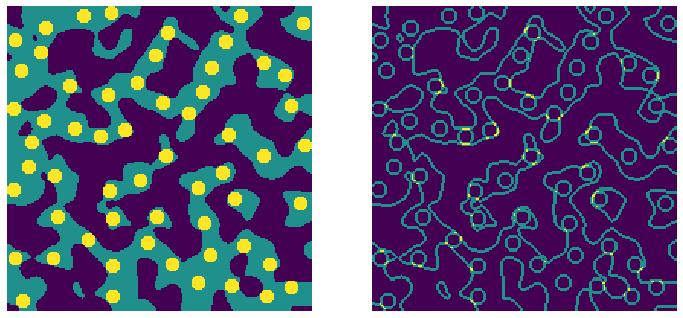

In [3]:
matrix = ps.generators.blobs([200, 200])
inclusions = ps.generators.rsa(~matrix, r=5, return_spheres=True, clearance=3)
bd = ps.filters.nphase_border(matrix*1.0 + inclusions*1.0)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(matrix*1.0 + inclusions*1.0, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(bd, origin='lower', interpolation='none')
ax[1].axis(False);

In [4]:
np.unique(bd)

array([1., 2., 3.])

The unique values in ``bd`` are 1, 2 and 3 indicating that some pixels border on 1 phase (internal pixels), 2 phases (edges) or 3 phases (corners where void, matrix and inclusion meet). Including diagonals results in a thicker border since more voxels are found that lie on an edge.

## `include_diagonals`
Controls that neighbor of the search.

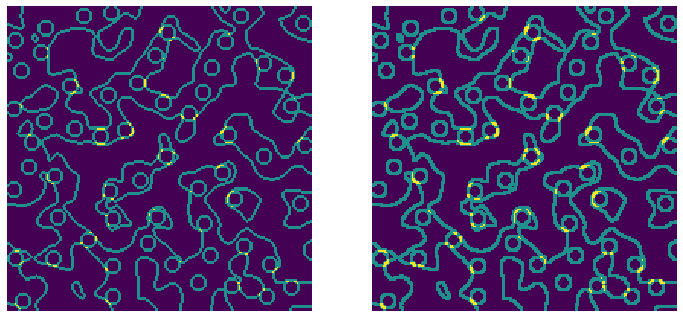

In [5]:
bd1 = ps.filters.nphase_border(matrix*1.0 + inclusions*1.0, include_diagonals=False)
bd2 = ps.filters.nphase_border(matrix*1.0 + inclusions*1.0, include_diagonals=True)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(bd1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(bd2, origin='lower', interpolation='none')
ax[1].axis(False);